<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/Automatic%20Time%20Series%20Decomposition_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels



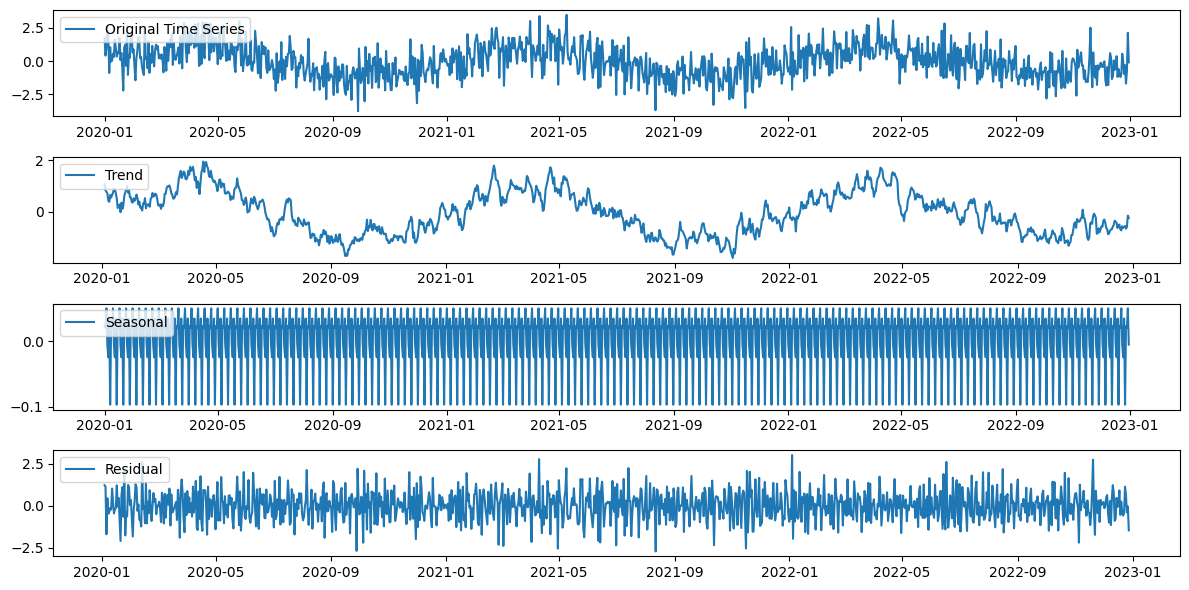

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate a sample time series data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
data = np.random.randn(len(dates)) + np.sin(2 * np.pi * np.arange(len(dates)) / 365)
ts = pd.Series(data, index=dates)

# Perform automatic time series decomposition
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(ts, label='Original Time Series')
plt.legend(loc='upper left')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [3]:
!pip install scikit-learn


Root Mean Squared Error (RMSE): 0.8174564718500977


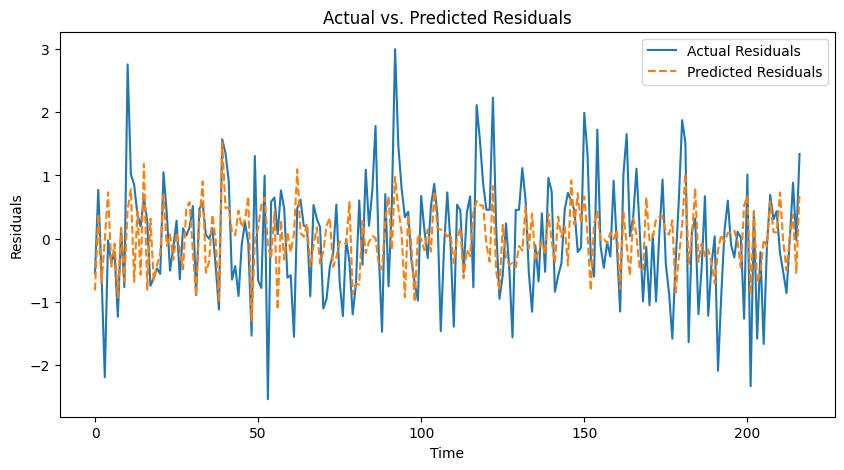

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate the time series data and perform decomposition as before
# (code for generating data and decomposition as shown in the previous response)

# Create a DataFrame to hold the original data and residuals
df = pd.DataFrame({'Original': ts, 'Residual': decomposition.resid})

# Create lag features for autoregressive modeling
def create_lagged_features(df, lag=1):
    for i in range(1, lag + 1):
        df[f'Residual_Lag_{i}'] = df['Residual'].shift(i)
    return df

lag = 5  # Number of lag features to create
df = create_lagged_features(df, lag)

# Drop rows with NaN values in lagged features
df.dropna(inplace=True)

# Split the data into training and testing sets
X = df[[f'Residual_Lag_{i}' for i in range(1, lag + 1)]]
y = df['Residual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE) as a performance metric
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted residuals
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Residuals')
plt.plot(y_pred, label='Predicted Residuals', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.title('Actual vs. Predicted Residuals')
plt.show()
